In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# CART
CAT stand for classfication tree 
RT stand for regression tree,

# decision Treee
the algothrim work in very simple way,suppose we have two indpendent variables and want to predict a dependent variable,
so the Decision Tree,split the data, in n splits,n depend on the nature of the data,now if new data is coming then,we the values will be assign to new data point,by averaging of the split data points and assign value to the new data point

# Information Entropy
the splits in the data points are done by algothrim,base on the idea of information entropy

the base idea is the split is getting information of the data,mean more splits in the data having more information in the data,
datapoints in a slit will have diffrent information compare to the other split,

In [2]:
dataset=pd.read_csv("./Position_Salaries.csv")

In [4]:
features=dataset.iloc[:,1:2].values
label=dataset.iloc[:,2].values

In [5]:
from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test=train_test_split(features,label,test_size=0.2,)

In [7]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(random_state=0)

In [8]:
model.fit(features,label)

DecisionTreeRegressor(random_state=0)

In [9]:
model.score(features,label)

1.0

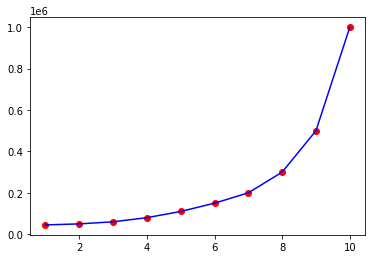

In [10]:
plt.scatter(features,label,color="red")
plt.plot(features,model.predict(features),color="blue")
plt.show()


# decision tree is not good 
it is not good in 1 demensional data,
it is good in more dimension

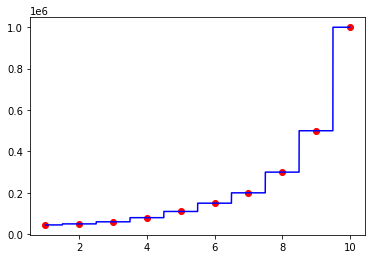

In [33]:
X_grid=np.arange(min(features),max(features),0.0001)
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(features,label,color="red")
plt.plot(X_grid,model.predict(X_grid),color="blue")
plt.show()

# it is non continous regression  line 

# information entropy
as decision tree is split,so which split is the best,
to find this,a simple rule is 
Check that which split reduce the ampurity of the child node,
for that we need to computer 
varaince reduction =var=1/n sum(y-yhat)**2
high values of varaince means high value of ampurity,

when a values of the variance of child node is recived then,
minus the 
total_var=sum(var(parent)-var(child))

In [2]:
dataset=pd.read_csv("./Housing.csv")
dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
features=pd.get_dummies(dataset.drop('price',axis=1))

In [4]:
label=dataset.price

In [5]:
features

,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,0,1,1,0,1,0,1,0,0,1,0,1,1,0,0
1,8960,4,4,4,3,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0
2,9960,3,2,2,2,0,1,1,0,0,1,1,0,1,0,0,1,0,1,0
3,7500,4,2,2,3,0,1,1,0,0,1,1,0,0,1,0,1,1,0,0
4,7420,4,1,2,2,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,2,0,1,1,0,0,1,1,0,1,0,1,0,0,0,1
541,2400,3,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0
542,3620,2,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1
543,2910,3,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0


In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,label,test_size=0.2)

In [7]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [15]:
model.score(X_train,y_train)
# model.score(X_test,y_test)

0.9986609731001015

In [13]:
from sklearn.metrics import mean_squared_error
train_set=model.predict(X_train)
val_set=model.predict(X_test)
print("training predication",train_set)

training predication [ 4375000.  3311000.  3290000.  4760000.  2660000.  3080000.  3815000.
  3780000.  7962500.  2100000.  8680000.  6107500.  4900000.  3990000.
  3850000.  4690000.  3773000.  7210000.  3290000.  6510000.  3500000.
  4200000.  8855000.  4893000.  8190000.  4620000.  3920000.  4270000.
  4900000.  2961000.  4025000.  3150000.  4200000.  3500000.  2450000.
 10150000.  4200000.  1767150.  4007500.  7840000.  6650000.  4900000.
  2590000.  3710000.  3255000.  6293000.  2800000.  6650000.  2485000.
  2485000.  3633000.  4515000.  4830000.  4550000.  5565000.  5215000.
  2450000.  4200000.  3430000.  3500000.  3500000.  6230000.  2520000.
  3010000.  4340000.  5460000.  4480000.  3710000.  4515000.  3325000.
  4403000.  5250000.  4473000.  6020000.  3640000.  3395000.  5950000.
  4473000.  5600000.  2870000.  8645000.  4550000.  4025000.  4830000.
  3570000.  3500000.  4655000.  3605000.  6419000.  3395000.  5810000.
  6720000.  5425000.  3920000.  3535000.  4480000.  4620

In [10]:
overfitting=mean_squared_error(y_train,train_set)
underfitting=mean_squared_error(y_test,val_set)

In [11]:
overfitting

4499458715.596331

In [16]:
underfitting

3156302874161.468

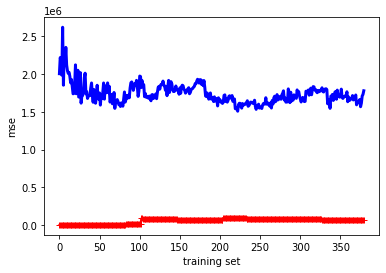

In [19]:
def learning_plot(model,X,y):
    X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.3)
    train_errors,val_errors=[],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict=model.predict(X_train[:m])
        y_val_prdict=model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_prdict))
    plt.xlabel("training set")
    plt.ylabel("mse")
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
learning_plot(model,features,label)

In [20]:
X=dataset.drop('price',axis=1)

In [21]:
y=dataset.price

In [22]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('encoder', OneHotEncoder(), [1])], remainder='passthrough')
# X_new = np.array(ct.fit_transform(X))
model=LabelEncoder()
# X=np.array(X)

In [51]:
# X=X.reshape(-1,1)

In [23]:
X_new=ct.fit_transform(X)


In [54]:
X.apply(LabelEncoder().fit_transform)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,232,3,1,2,1,0,0,0,1,2,1,0
1,260,3,3,3,1,0,0,0,1,3,0,0
2,268,2,1,1,1,0,1,0,0,2,1,1
3,237,3,1,1,1,0,1,0,1,3,1,0
4,232,3,0,1,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,39,1,0,0,1,0,1,0,0,2,0,2
541,15,2,0,0,0,0,0,0,0,0,0,1
542,72,1,0,0,1,0,0,0,0,0,0,2
543,35,2,0,0,0,0,0,0,0,0,0,0


# labelEncoding for multiple columns
X.apply(LabelEncoder().fit_transform)

In [58]:
OneHotEncoder().fit_transform(X)

<545x317 sparse matrix of type '<class 'numpy.float64'>'
	with 6540 stored elements in Compressed Sparse Row format>

In [59]:
pd.DataFrame(columns=X.columns, data=LabelEncoder().fit_transform(X.values.flatten()).reshape(X.shape))

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,2910,3,1,1,no,no,no,no,no,0,no,furnished
